### DOBRODOŠLI v programu za analizo podatkov spletne strani https://myanimelist.net/topanime.php
Edino pravilo za uporabo je pogon vsake celice.

V prvi celici sem zakomentiral funkcijo. Vse kar je treba storiti je porbisati "#" in pognati celico, to bi vam moralo ustvariti csv datoteko, v kateri bodo zapisani podatki

In [157]:
from mojcsv import *
#naredi_csv("ime_csv_datoteke.csv", stevilo_strani=20)

In [158]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
animeji = pd.read_csv("ime_csv_datoteke.csv")
animeji.index = animeji.index + 1
animeji["ime"] = animeji["ime"].str.replace("&#039;", "'")
animeji['število uporabnikov'] = animeji['število uporabnikov'].str.replace(',', '').astype(float)
animeji.head(1000)

,ime,zvrst in število epizod,čas nastajanja,število uporabnikov,ocena
1,Sousou no Frieren,TV (28 eps),Sep 2023 - Mar 2024,830956.0,9.34
2,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3387187.0,9.09
3,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,2594510.0,9.07
4,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,639363.0,9.06
5,Shingeki no Kyojin Season 3 Part 2,TV (10 eps),Apr 2019 - Jul 2019,2318187.0,9.05
...,...,...,...,...,...
996,Lupin the IIIrd: Jigen Daisuke no Bohyou,Movie (1 eps),Jun 2014 - Jun 2014,30040.0,7.80
997,Magi: Sinbad no Bouken,OVA (5 eps),May 2014 - Jul 2015,137960.0,7.80
998,Mahoujin Guruguru (2017),TV (24 eps),Jul 2017 - Dec 2017,33666.0,7.80
999,Meitantei Conan Movie 08: Ginyoku no Time Trav...,TV Special (1 eps),Apr 2004 - Apr 2004,22169.0,7.80


In [159]:
najbolje_ocenjeni = animeji.sort_values(by="ocena", ascending=False)
najbolje_ocenjeni.head(10)

,ime,zvrst in število epizod,čas nastajanja,število uporabnikov,ocena
1,Sousou no Frieren,TV (28 eps),Sep 2023 - Mar 2024,830956.0,9.34
2,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3387187.0,9.09
3,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,2594510.0,9.07
4,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,639363.0,9.06
5,Shingeki no Kyojin Season 3 Part 2,TV (10 eps),Apr 2019 - Jul 2019,2318187.0,9.05
6,Gintama: The Final,Movie (1 eps),Jan 2021 - Jan 2021,154553.0,9.04
8,Hunter x Hunter (2011),TV (148 eps),Oct 2011 - Sep 2014,2878889.0,9.03
7,Gintama',TV (51 eps),Apr 2011 - Mar 2012,563897.0,9.03
9,Ginga Eiyuu Densetsu,OVA (110 eps),Jan 1988 - Mar 1997,327129.0,9.02
10,Gintama': Enchousen,TV (13 eps),Oct 2012 - Mar 2013,329363.0,9.02


In [160]:
najpopularnejši_animeji = animeji.sort_values(by="število uporabnikov", ascending=False)
najpopularnejši_animeji.head(10)

,ime,zvrst in število epizod,čas nastajanja,število uporabnikov,ocena
109,Shingeki no Kyojin,TV (25 eps),Apr 2013 - Sep 2013,3998108.0,8.55
85,Death Note,TV (37 eps),Oct 2006 - Jun 2007,3951551.0,8.62
2,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3387187.0,9.09
139,One Punch Man,TV (12 eps),Oct 2015 - Dec 2015,3259728.0,8.49
152,Kimetsu no Yaiba,TV (26 eps),Apr 2019 - Sep 2019,3088798.0,8.46
863,Boku no Hero Academia,TV (13 eps),Apr 2016 - Jun 2016,3060413.0,7.86
640,Naruto,TV (220 eps),Oct 2002 - Feb 2007,2886521.0,8.00
8,Hunter x Hunter (2011),TV (148 eps),Oct 2011 - Sep 2014,2878889.0,9.03
28,Kimi no Na wa.,Movie (1 eps),Aug 2016 - Aug 2016,2780339.0,8.83
123,Shingeki no Kyojin Season 2,TV (12 eps),Apr 2017 - Jun 2017,2758933.0,8.52


In [161]:
povprečna_ocena = animeji["ocena"].mean()
print("Povprečna ocena:", povprečna_ocena)

Povprečna ocena: 8.15992


In [162]:
anime_serije = animeji[animeji["zvrst in število epizod"].str.contains("TV")]
def izlušči_epizode(podatki):
    try:
        return int(podatki.split('(')[1].split(' ')[0])
    except:
        return None

anime_serije["epizode"] = anime_serije["zvrst in število epizod"].apply(izlušči_epizode)
povprečno_št_epizod_anime_serije = anime_serije["epizode"].mean()
print("Povprečno število epizod anime serije:", povprečno_št_epizod_anime_serije)

Povprečno število epizod anime serije: 28.812925170068027


C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_12004\3915892010.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_serije["epizode"] = anime_serije["zvrst in število epizod"].apply(izlušči_epizode)


In [163]:
najdaljši_animeji = animeji[animeji["zvrst in število epizod"].str.contains("TV")].copy()
najdaljši_animeji["epizode"] = najdaljši_animeji["zvrst in število epizod"].apply(izlušči_epizode)
najdaljši_animeji = najdaljši_animeji.sort_values(by="epizode", ascending=False)
najdaljši_animeji = najdaljši_animeji.drop(columns=["epizode"])
najdaljši_animeji.head(10)

,ime,zvrst in število epizod,čas nastajanja,število uporabnikov,ocena
904,Doraemon (1979),TV (1787 eps),Apr 1979 - Mar 2005,64841.0,7.84
296,Naruto: Shippuuden,TV (500 eps),Feb 2007 - Mar 2017,2518207.0,8.27
704,Bleach,TV (366 eps),Oct 2004 - Mar 2012,1995338.0,7.95
408,Dragon Ball Z,TV (291 eps),Apr 1989 - Jan 1996,1240118.0,8.18
640,Naruto,TV (220 eps),Oct 2002 - Feb 2007,2886521.0,8.00
475,Katekyou Hitman Reborn!,TV (203 eps),Oct 2006 - Sep 2010,561280.0,8.12
18,Gintama,TV (201 eps),Apr 2006 - Mar 2010,1076235.0,8.93
890,Tennis no Oujisama,TV (178 eps),Oct 2001 - Mar 2005,186535.0,7.85
448,Black Clover,TV (170 eps),Oct 2017 - Mar 2021,1697643.0,8.14
867,InuYasha,TV (167 eps),Oct 2000 - Sep 2004,807061.0,7.86


Text(0, 0.5, 'pogostost')

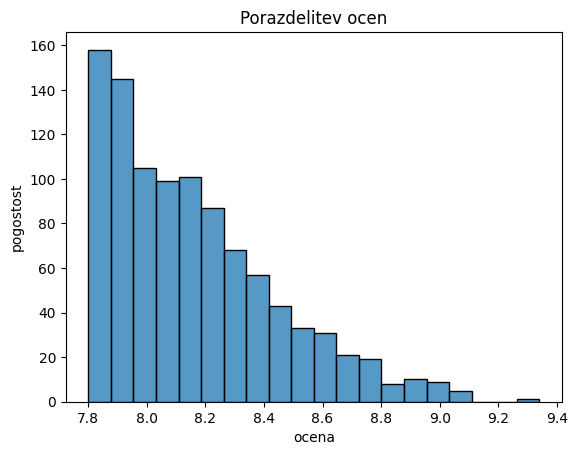

In [164]:
sns.histplot(animeji["ocena"])
plt.title("Porazdelitev ocen")
plt.ylabel("pogostost")

Text(0.5, 1.0, 'Epizode in ocena')

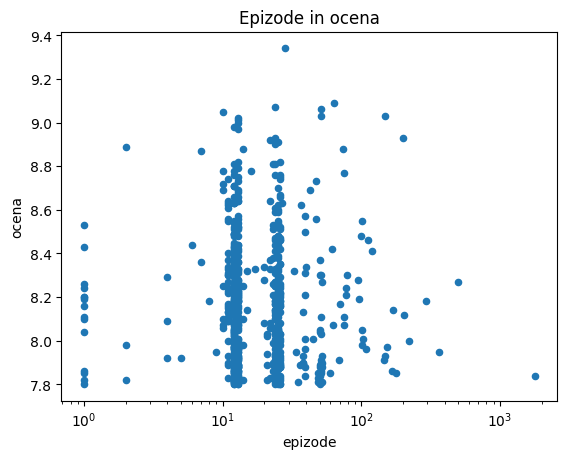

In [165]:
najdaljši_animeji = animeji[animeji["zvrst in število epizod"].str.contains("TV")].copy()
najdaljši_animeji["epizode"] = najdaljši_animeji["zvrst in število epizod"].apply(izlušči_epizode)
anime_serije.plot.scatter(x="epizode", y="ocena", logx=True)
plt.title("Epizode in ocena")

Text(0, 0.5, 'pogostost')

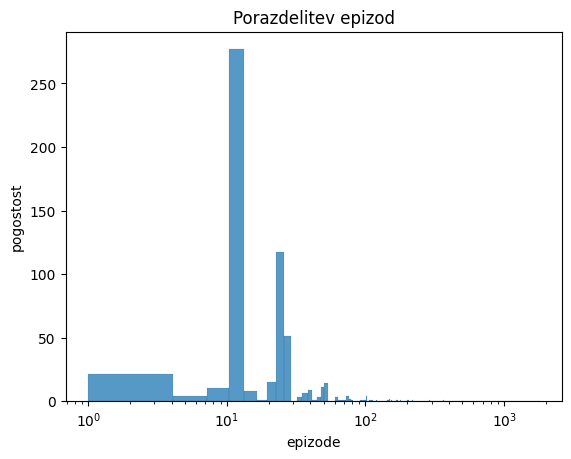

In [166]:
sns.histplot(anime_serije["epizode"])
plt.xscale('log')
plt.title("Porazdelitev epizod")
plt.ylabel("pogostost")